In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [63]:
ev=pd.read_csv('car-sales.csv')
ev.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


Exploratory data analyst

In [64]:
ev.shape

(50, 11)

In [65]:
ev.isnull().sum()

id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64

In [66]:
ev.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [67]:
ev.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


C:\Users\PRATIK\AppData\Local\Temp\ipykernel_6676\3720251984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=ev, palette='Set2')


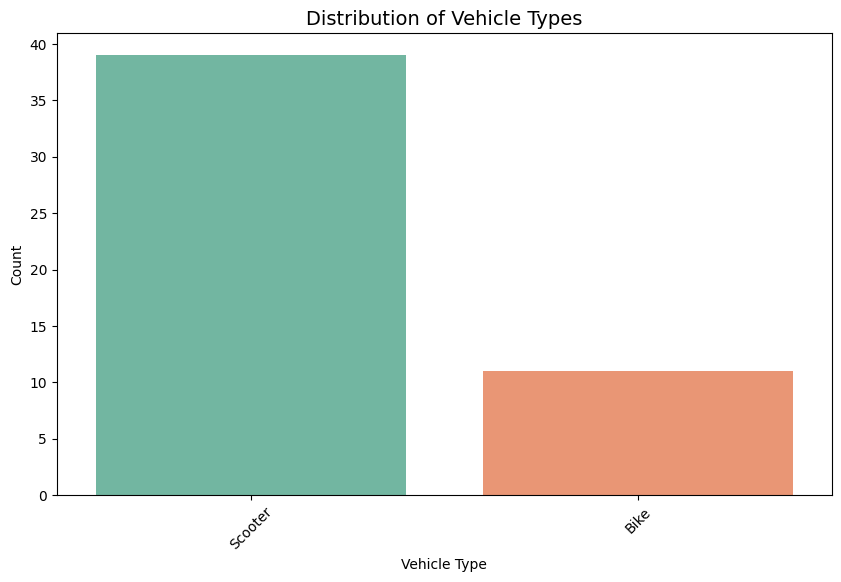

In [68]:
# 1. Count plot of vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Type', data=ev, palette='Set2')
plt.title('Distribution of Vehicle Types', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_6676\615521826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Manufacturer', data=ev, palette='Set1')


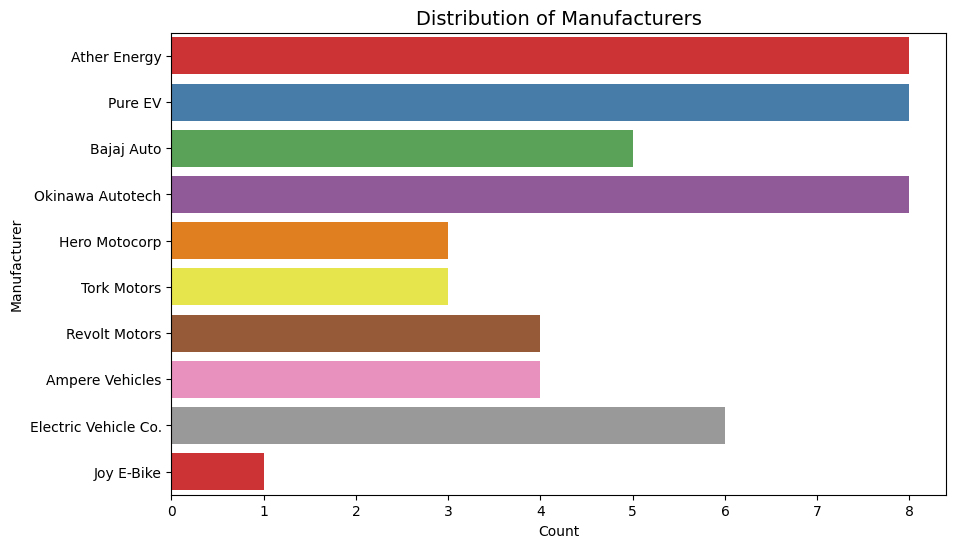

In [84]:
# 2. Count plot of manufacturers
plt.figure(figsize=(10, 6))
sns.countplot(y='Manufacturer', data=ev, palette='Set1')
plt.title('Distribution of Manufacturers', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

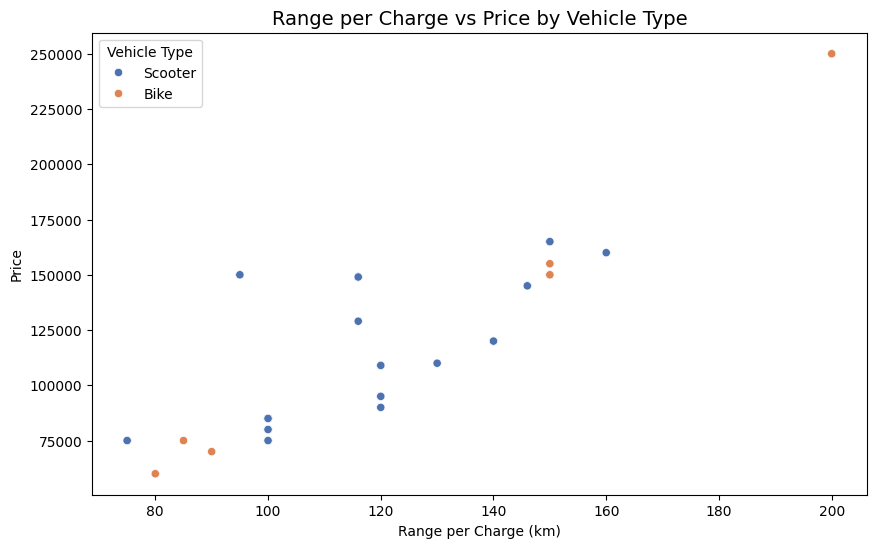

In [85]:
# 5. Scatter plot of Range per Charge vs Price, colored by Vehicle Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range per Charge (km)', y='Price', hue='Vehicle Type', data=ev, palette='deep')
plt.title('Range per Charge vs Price by Vehicle Type', fontsize=14)
plt.xlabel('Range per Charge (km)')
plt.ylabel('Price')
plt.show()

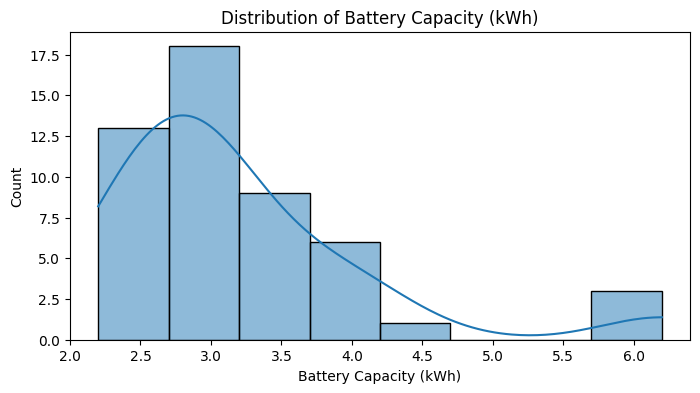

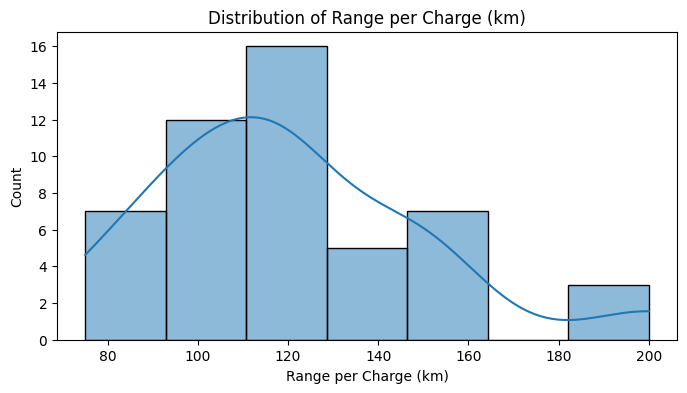

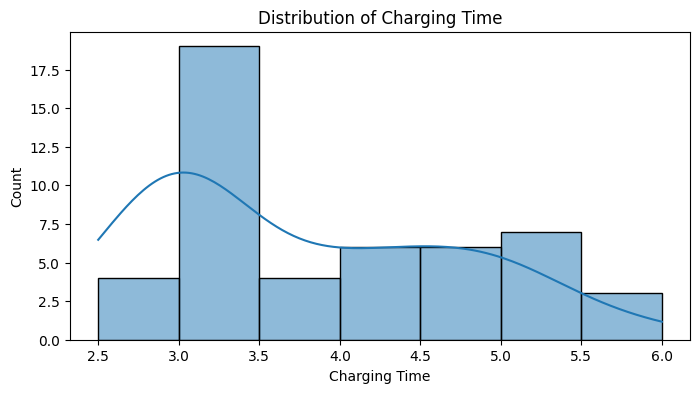

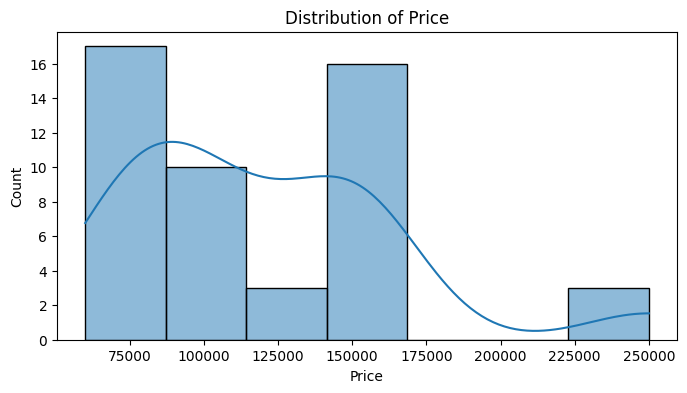

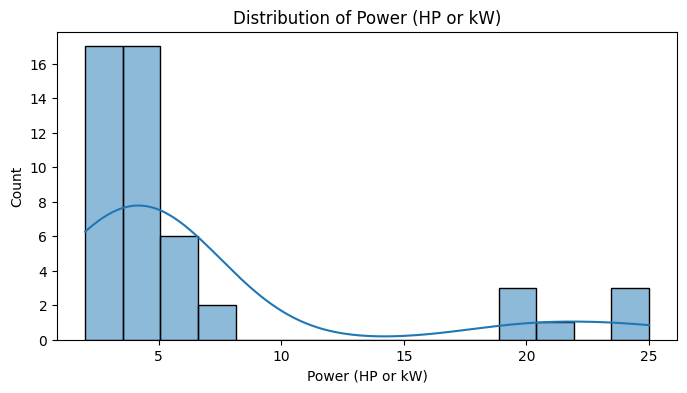

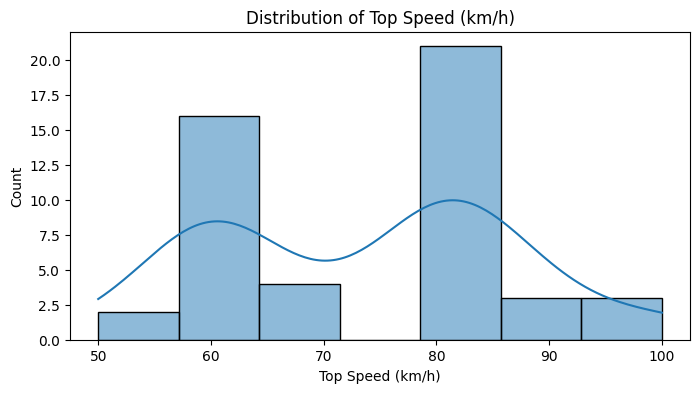

In [69]:
# Visualize the distribution of numerical columns
num_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(ev[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


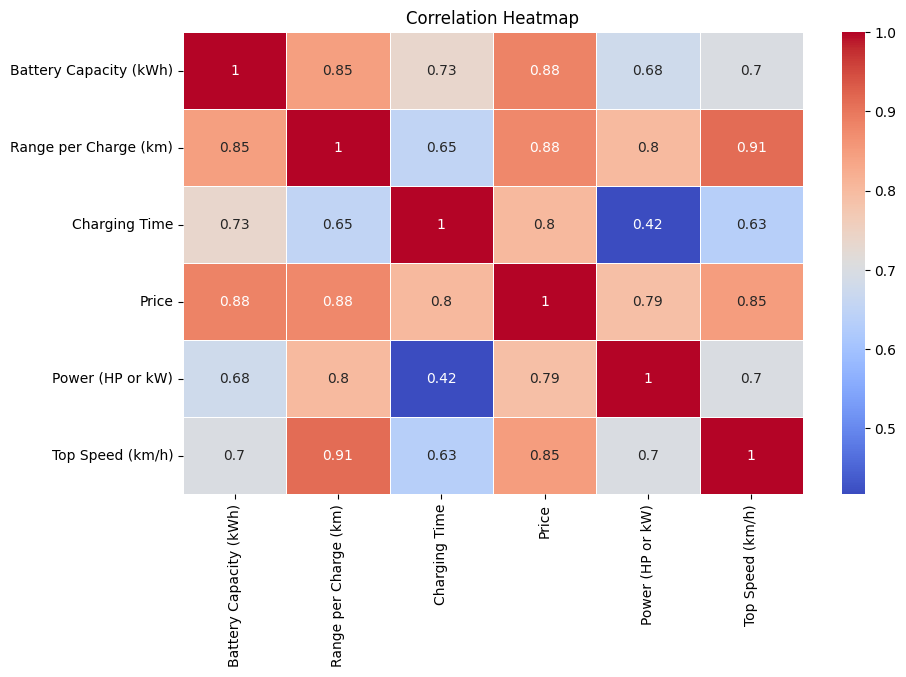

In [70]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ev[num_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

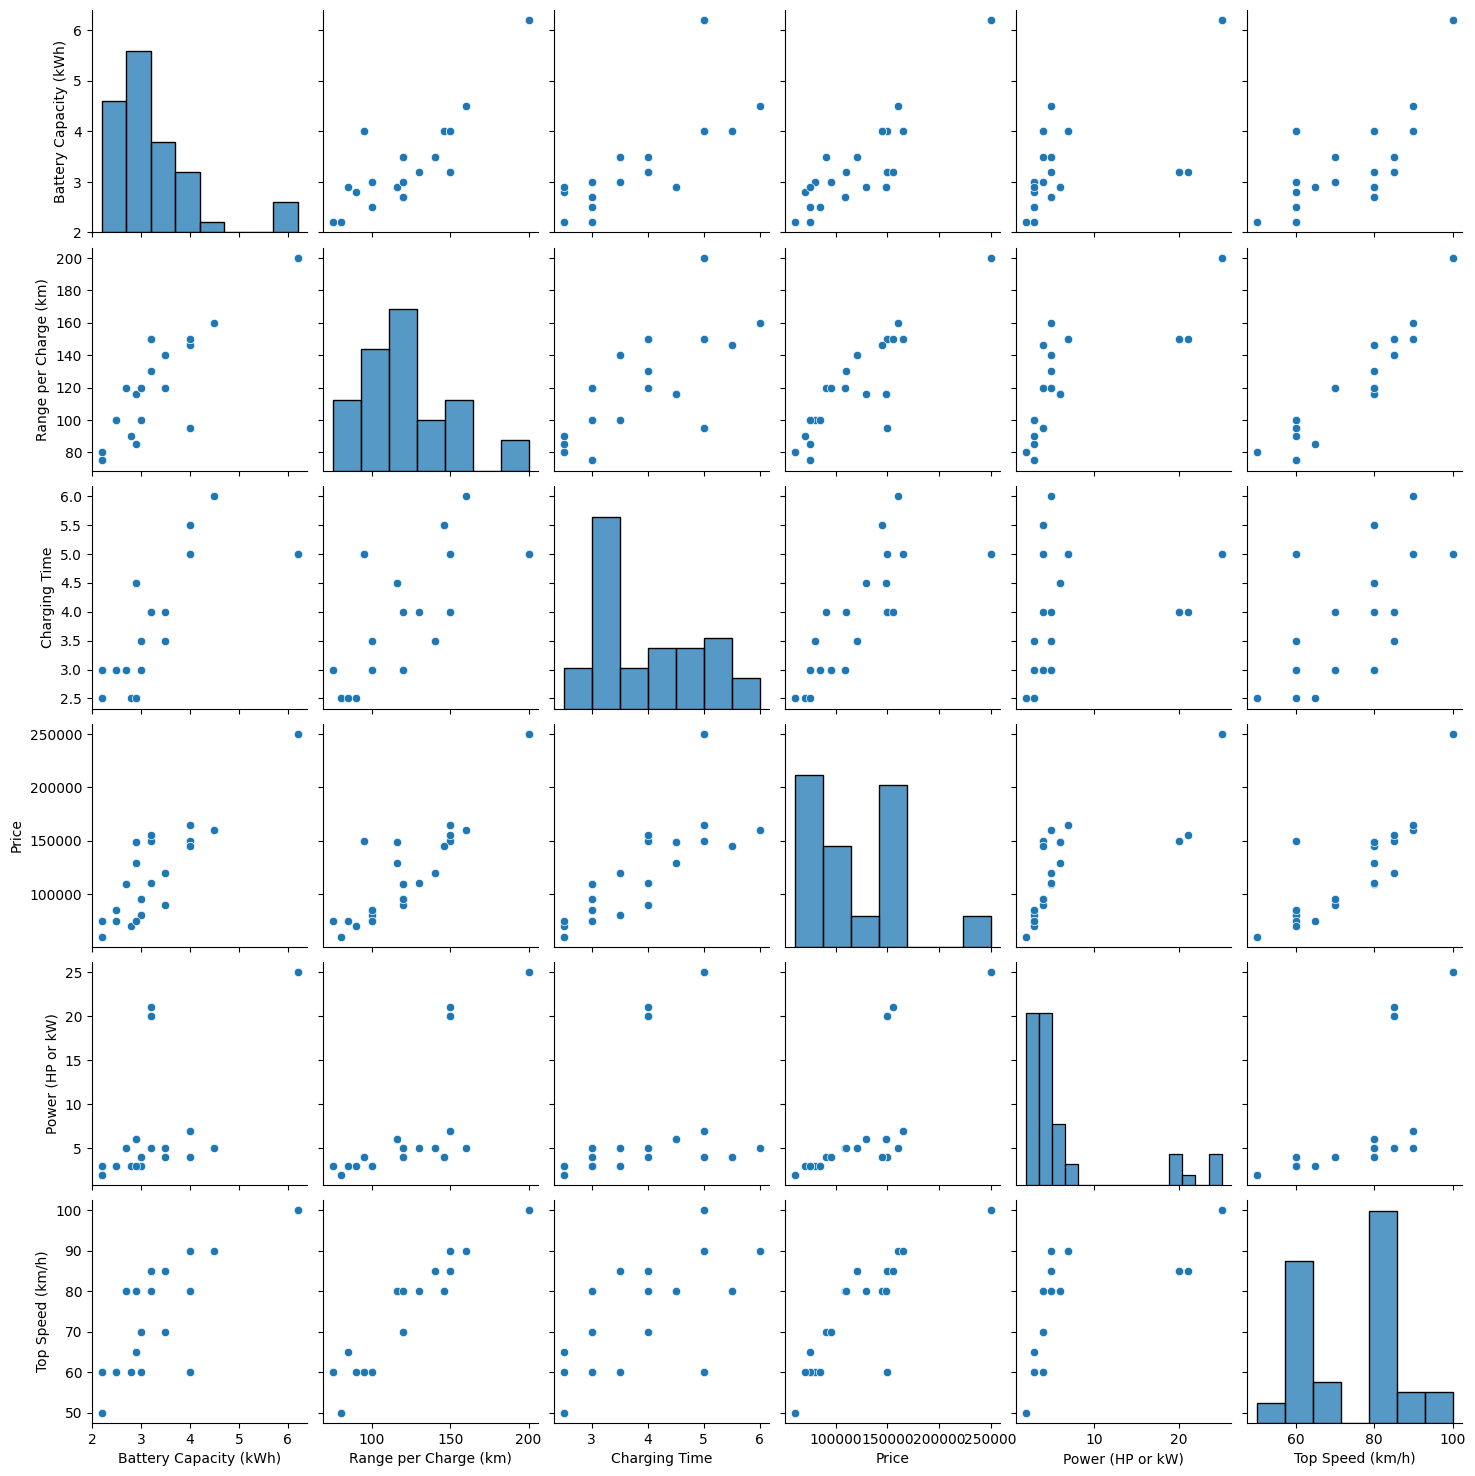

In [71]:
# Scatterplot Matrix to identify relationships between variables
sns.pairplot(ev[num_columns])
plt.show()

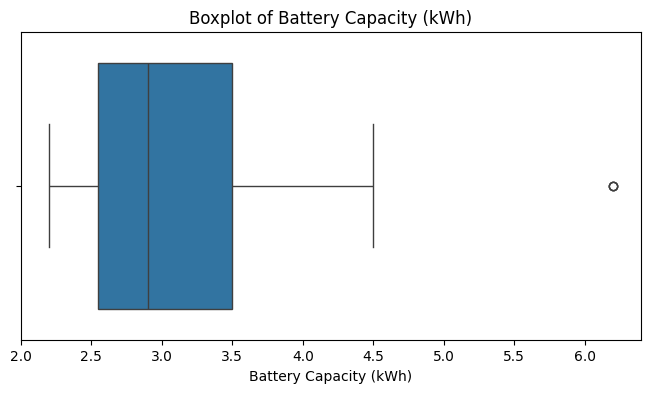

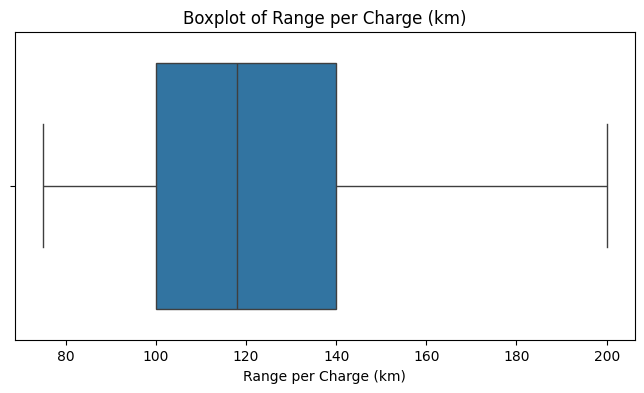

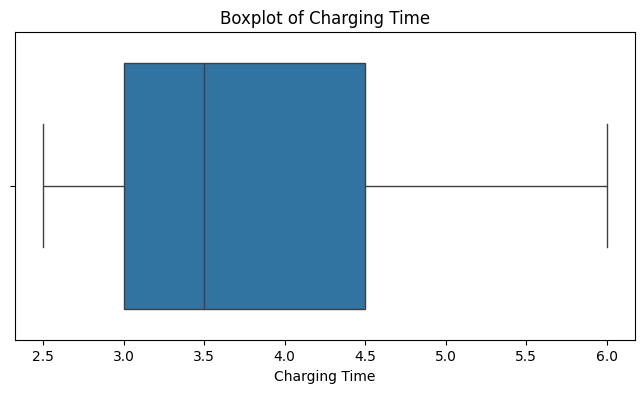

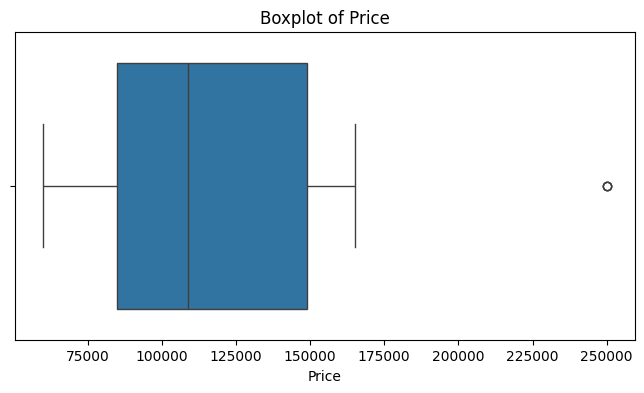

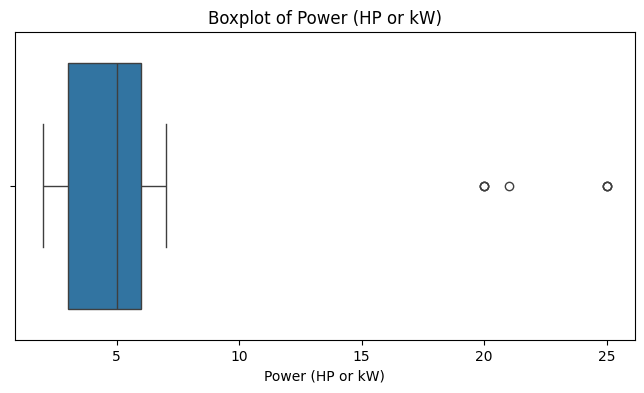

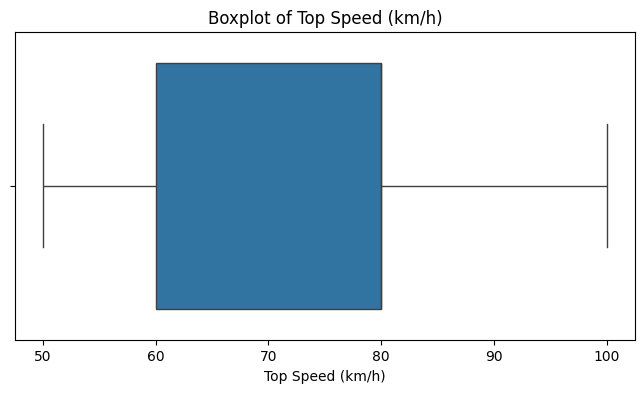

In [72]:
# Boxplots to identify outliers in the data
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=ev[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

 Feature Engineering

In [73]:

# Price-to-Range ratio (Price per km of range)
ev['Price_to_Range'] = ev['Price'] / ev['Range per Charge (km)']

# Cost per kWh of battery capacity
ev['Cost_per_kWh'] = ev['Price'] / ev['Battery Capacity (kWh)']

Data Scaling

In [74]:
# K-Means Clustering with Hyperparameter Tuning

# Dropping missing values and scaling the data
df_clean = ev.dropna()
scaler = StandardScaler()
numeric_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 
                   'Power (HP or kW)', 'Top Speed (km/h)', 'Price_to_Range', 'Cost_per_kWh']
scaled_data = scaler.fit_transform(df_clean[numeric_columns])

Dimensionality Reduction (PCA)

In [75]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Clustering with K-Means

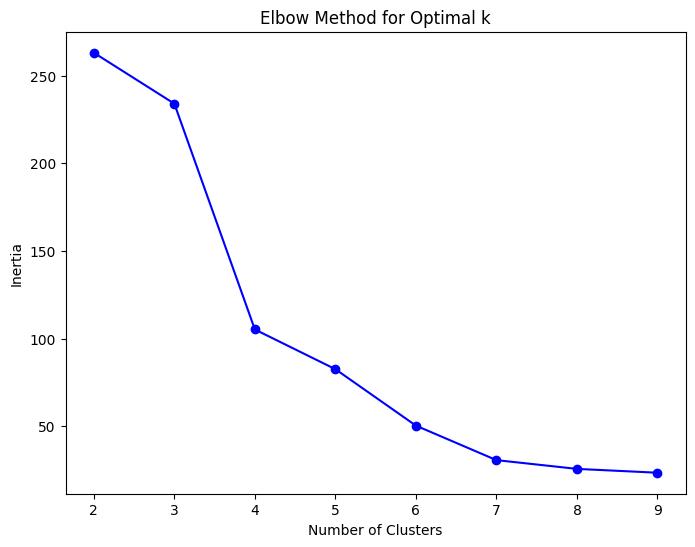

In [76]:
# Finding the optimal number of clusters using the Elbow and Silhouette methods
inertia = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


# Plotting the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


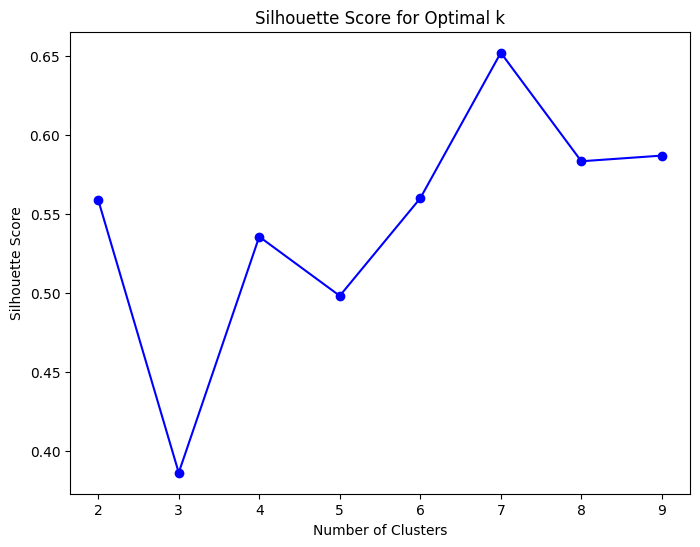

In [77]:
# Plotting Silhouette Score

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [78]:
# Choosing optimal k (let's say k=4) and applying K-Means

kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_6676\1704687660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)


Try other clustering algorithms for comparison

In [79]:
from sklearn.mixture import GaussianMixture

# a) DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

# b) Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
df_clean['Cluster_GMM'] = gmm.fit_predict(scaled_data)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_6676\804802959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_6676\804802959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster_GMM'] = gmm.fit_predict(scaled_data)


In [80]:
# DBSCAN often assigns noise points with label -1, so we need a special evaluation for it
from sklearn.metrics import silhouette_score, davies_bouldin_score

dbscan_labels = df_clean['Cluster_DBSCAN']
if len(set(dbscan_labels)) > 1:  # Make sure DBSCAN found clusters
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    dbscan_davies_bouldin = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    print(f"DBSCAN Davies-Bouldin Score: {dbscan_davies_bouldin}")
else:
    print("DBSCAN did not find sufficient clusters for evaluation.")


DBSCAN Silhouette Score: 0.06380923732651834
DBSCAN Davies-Bouldin Score: 1.4368078438460552


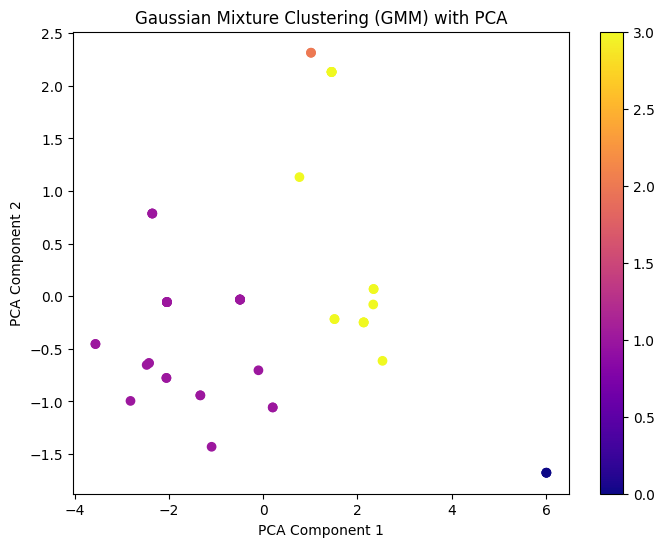

In [81]:
# Visualizing GMM clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster_GMM'], cmap='plasma')
plt.title('Gaussian Mixture Clustering (GMM) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

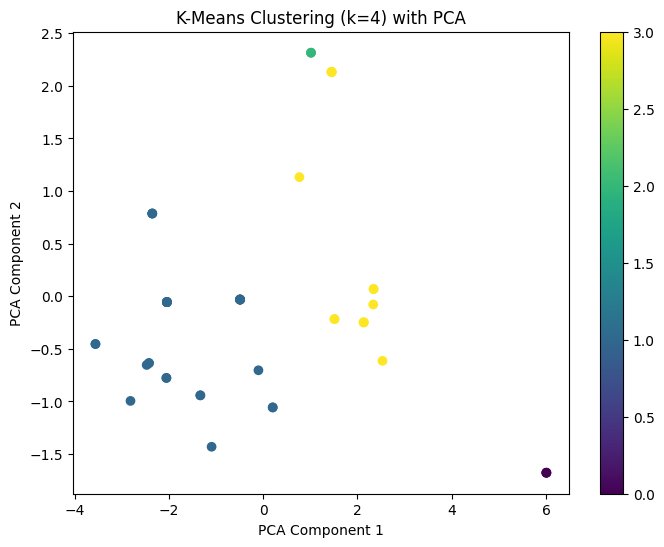

In [82]:
# 8. Visualizing the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster_KMeans'], cmap='viridis')
plt.title('K-Means Clustering (k=4) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [83]:
# Grouping data by cluster
# Select only numeric columns for aggregation
numeric_columns_only = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Grouping and summarizing only numeric data
cluster_summary = df_clean.groupby('Cluster_KMeans')[numeric_columns_only].mean()

# Displaying the cluster summary
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
                        id  Battery Capacity (kWh)  Range per Charge (km)  \
Cluster_KMeans                                                             
0               12.666667                6.200000             200.000000   
1               27.448276                2.710345             105.172414   
2                5.500000                4.000000              95.000000   
3               25.333333                3.380000             136.533333   

                Charging Time          Price  Power (HP or kW)  \
Cluster_KMeans                                                   
0                    5.000000  250000.000000         25.000000   
1                    3.068966   89448.275862          3.655172   
2                    5.000000  150000.000000          4.000000   
3                    4.666667  150600.000000          9.600000   

                Top Speed (km/h)  Year of Manufacture  Price_to_Range  \
Cluster_KMeans                                         